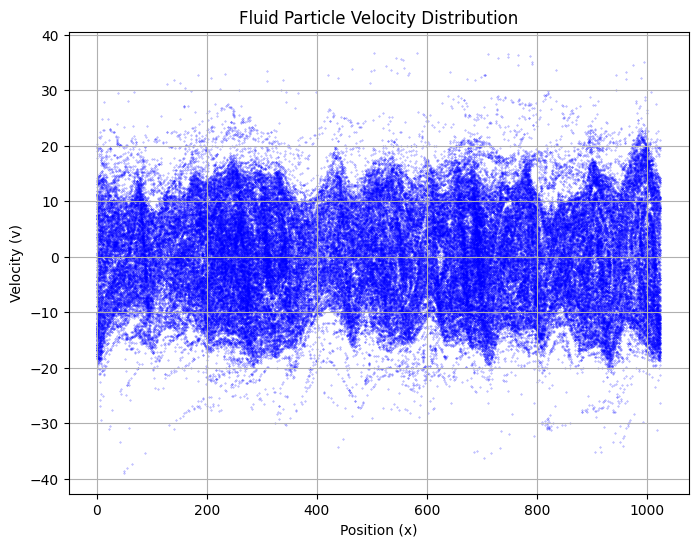

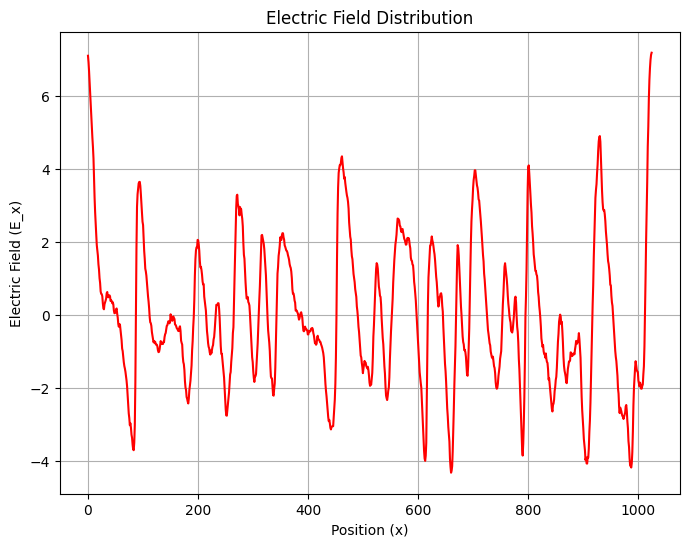

In [152]:
import numpy as np 
import matplotlib.pyplot as plt

data_x = np.loadtxt("result.dat")
data_v = np.loadtxt("velocity.dat")
data_ex = np.loadtxt("electric_field.dat")

x = data_x[-1, 1::4]
v = data_v[-1, 1::4]
ex = data_ex[-1, 1:]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, v, s=0.1, color='blue', alpha=0.5)
ax.set_title("Fluid Particle Velocity Distribution")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Velocity (v)")
ax.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.linspace(0, 1024, len(ex)), ex, color='red')
ax.set_title("Electric Field Distribution")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Electric Field (E_x)")
ax.grid(True)
plt.show()

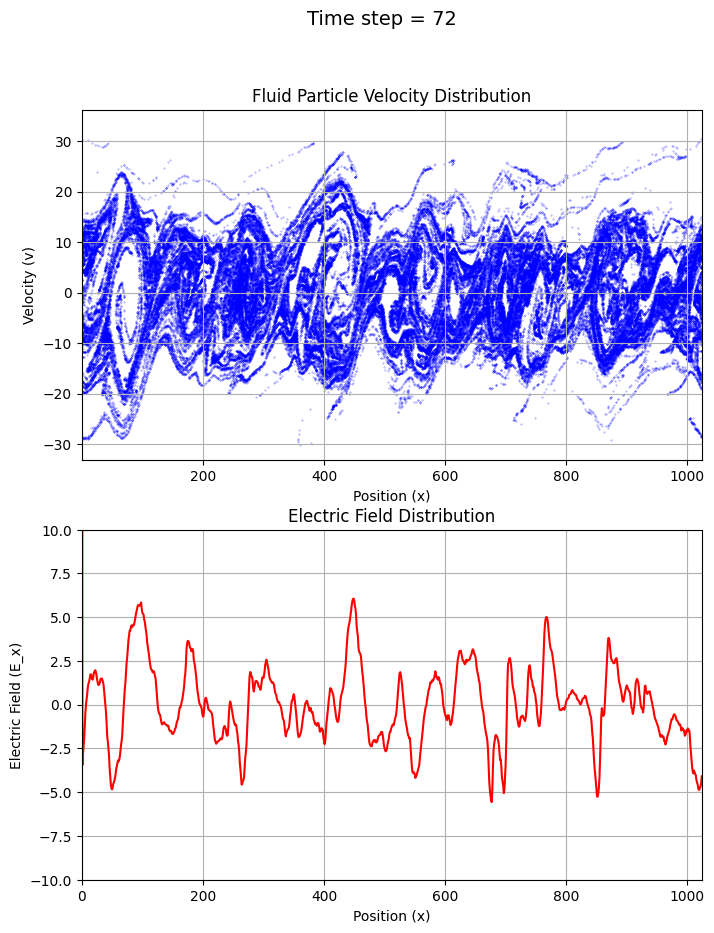

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ------------------------
# データ読み込み
# ------------------------
data_x  = np.loadtxt("result.dat")
data_v  = np.loadtxt("velocity.dat")
data_ex = np.loadtxt("electric_field.dat")

Nt = data_x.shape[0]
Nx = data_ex.shape[1]

# ------------------------
# Figure & Axes
# ------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# --- x-v scatter ---
scat = ax1.scatter([], [], s=0.1, color='blue', alpha=0.5)
ax1.set_xlim(np.min(data_x[:,1::4]), np.max(data_x[:,1::4]))
ax1.set_ylim(np.min(data_v[:,1::4]), np.max(data_v[:,1::4]))
ax1.set_xlabel("Position (x)")
ax1.set_ylabel("Velocity (v)")
ax1.set_title("Fluid Particle Velocity Distribution")
ax1.grid(True)

# --- Ex line ---
x_ex = np.linspace(0, 1024, Nx)
(line,) = ax2.plot(x_ex, np.zeros(Nx), color='red')
ax2.set_xlim(0, 1024)
ax2.set_ylim(-10, 10)
ax2.set_xlabel("Position (x)")
ax2.set_ylabel("Electric Field (E_x)")
ax2.set_title("Electric Field Distribution")
ax2.grid(True)

# ------------------------
# update function
# ------------------------
def update(frame):
    x = data_x[frame, 1::4]
    v = data_v[frame, 1::4]
    ex = data_ex[frame, :]

    scat.set_offsets(np.c_[x, v])
    line.set_ydata(ex)

    fig.suptitle(f"Time step = {frame}", fontsize=14)
    return scat, line

# ------------------------
# animation
# ------------------------
ani = FuncAnimation(
    fig,
    update,
    frames=Nt,
    interval=50,   # ms
    blit=False
)

ani.save("simulation.mp4", fps=20, dpi=150)
plt.show()
